In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

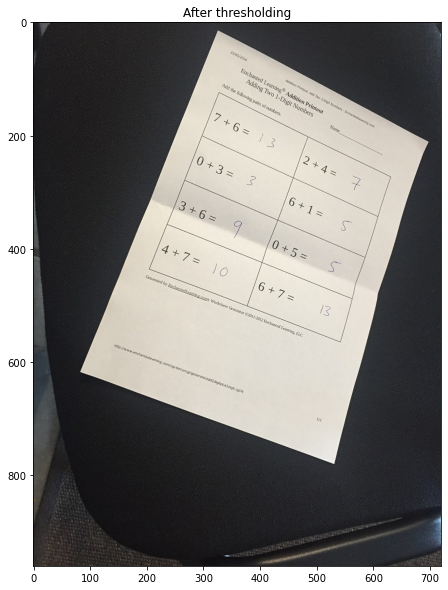

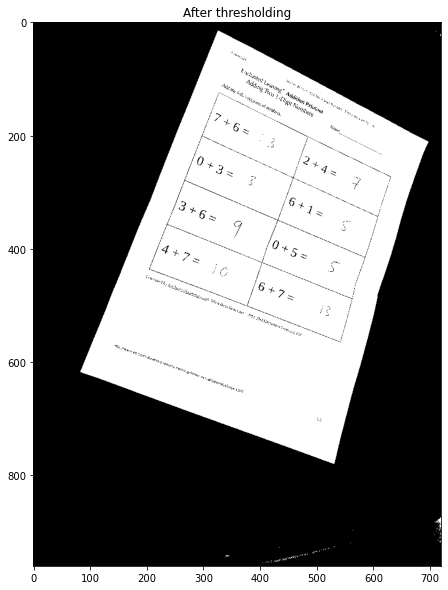

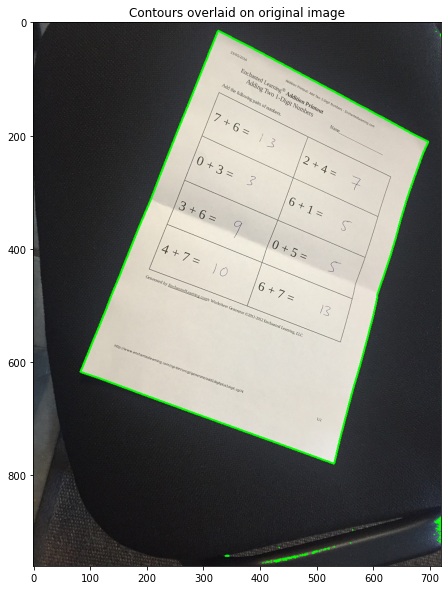

Number of Contours found = 54


In [2]:
image = cv2.imread("C:/Users/rajen/Computer Vision/images/images/scan.jpg")
imshow('After thresholding', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
i1 = image.copy()
cv2.drawContours(i1, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', i1)

print("Number of Contours found = " + str(len(contours)))

In [3]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# loop over the contours
for cnt in sorted_contours:
	# approximate the contour
	perimeter = cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
 
	if len(approx) == 4:
		break

# Our x, y cordinates of the four corners 
print("Our 4 corner points are:")
print(approx)


Our 4 corner points are:
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


In [4]:
x = cv2.arcLength(sorted_contours[20],True)

In [5]:
 cv2.approxPolyDP(sorted_contours[20], 0.05 * x, True)

array([[[461, 942]],

       [[463, 944]],

       [[462, 945]],

       [[463, 944]]], dtype=int32)

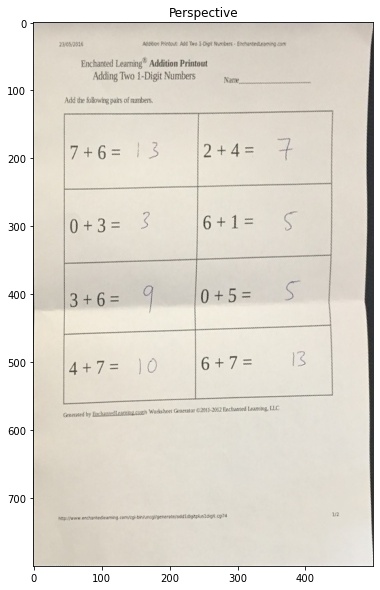

In [6]:
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (500,800))

imshow("Perspective", dst)

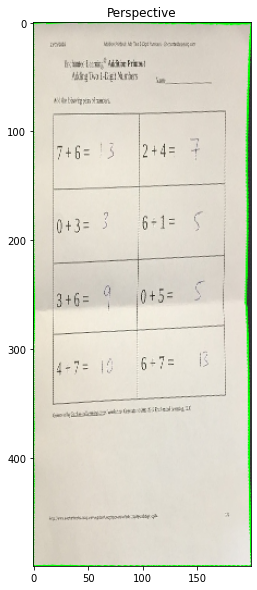

In [23]:
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,500],
                       [200,500],
                       [200,0]])

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (200,500))

imshow("Perspective", dst)

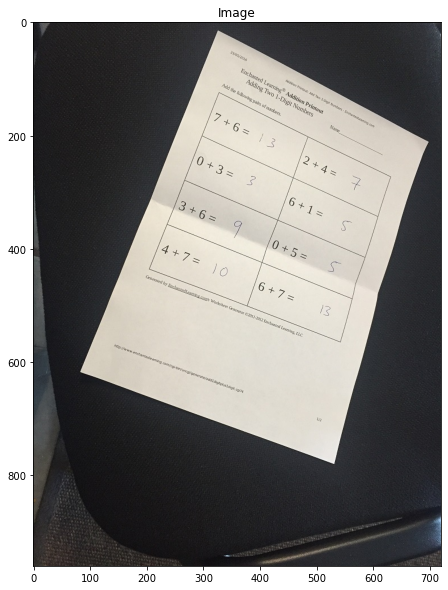

In [8]:
image = cv2.imread("C:/Users/rajen/Computer Vision/images/images/scan.jpg")
imshow('Image',image)

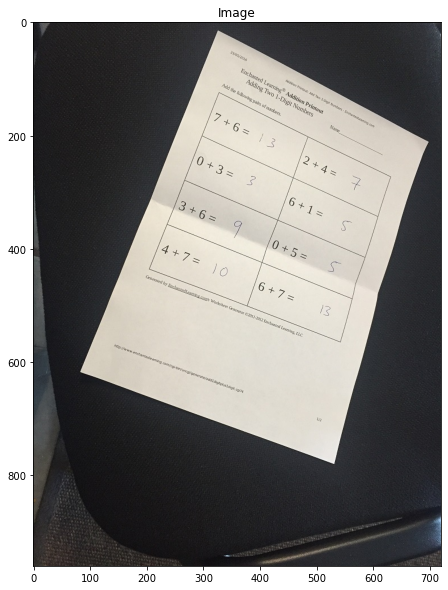

In [9]:
i1 = image.copy()
imshow('Image',i1)